In [3]:
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
shotlog = "shot_logs.csv"

In [5]:
shotlogdf = pd.read_csv(shotlog)
shotlogdf.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [6]:
shotlogdf["GAME_CLOCK"] = shotlogdf['GAME_CLOCK'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [21]:
shotlogdf.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,69,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,707,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,634,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [84]:
Mades = shotlogdf.loc[ 
                         (shotlogdf["SHOT_RESULT"] == "made") &
                         (shotlogdf["LOCATION"] == "H") 
                         
                         ,:]

In [85]:
Mades.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
11,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,3,4,692,12.1,14,...,14.6,2,made,"Lin, Jeremy",202391,1.8,1,2,brian roberts,203148
12,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,4,4,535,4.3,2,...,5.9,2,made,"Hill, Jordan",201941,5.4,1,2,brian roberts,203148
33,21400816,"FEB 21, 2015 - CHA vs. OKC",H,L,-7,3,4,694,9.9,1,...,7.6,2,made,"Augustin, D.J.",201571,2.4,1,2,brian roberts,203148
34,21400816,"FEB 21, 2015 - CHA vs. OKC",H,L,-7,4,4,488,6.1,2,...,8.0,2,made,"Augustin, D.J.",201571,1.8,1,2,brian roberts,203148
35,21400783,"FEB 10, 2015 - CHA vs. DET",H,L,-28,1,1,526,16.0,10,...,6.9,2,made,"Drummond, Andre",203083,4.9,1,2,brian roberts,203148


In [99]:
sns.kdeplot(Mades.SHOT_DIST, Mades.FINAL_MARGIN)
plt.title('Distribution of 3s')
plt.xlim((-2,30))
plt.ylim((-30,30))


(-30, 30)

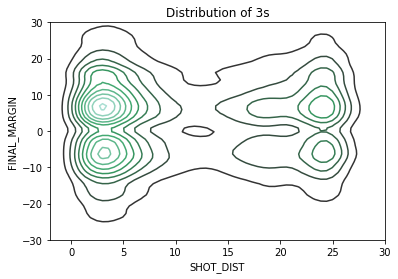

In [100]:
plt.show()
plt.savefig("shots.png")